# Implementando PCA

- bike:   https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset
- obesity https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+

In [1]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
# ## load bike por dia
# data = pd.read_csv(r"data\bike\day.csv").set_index('instant')
# print(data.info())
# data.head()

In [3]:
## obesity
data = pd.read_csv(r"data\obesity\ObesityDataSet_raw_and_data_sinthetic.csv")
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.00,1.62,64.00,yes,no,2.00,3.00,Sometimes,no,2.00,no,0.00,1.00,no,Public_Transportation,Normal_Weight
1,Female,21.00,1.52,56.00,yes,no,3.00,3.00,Sometimes,yes,3.00,yes,3.00,0.00,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.00,1.80,77.00,yes,no,2.00,3.00,Sometimes,no,2.00,no,2.00,1.00,Frequently,Public_Transportation,Normal_Weight
3,Male,27.00,1.80,87.00,no,no,3.00,3.00,Sometimes,no,2.00,no,2.00,0.00,Frequently,Walking,Overweight_Level_I
4,Male,22.00,1.78,89.80,no,no,2.00,1.00,Sometimes,no,2.00,no,0.00,0.00,Sometimes,Public_Transportation,Overweight_Level_II


The attributes related with eating habits are:
- Frequent consumption of high caloric food (FAVC)
- Frequency of consumption of vegetables (FCVC)
- Number of main meals (NCP)
- Consumption of food between meals (CAEC)
- Consumption of water daily (CH20)
- Consumption of alcohol (CALC)

The attributes related with the physical condition are: 
- Calories consumption monitoring (SCC)
- Physical activity frequency (FAF)
- Time using technology devices (TUE)
- Transportation used (MTRANS)

In [4]:
cols = ['sexo','edad','altura','peso','historia_fam','consumo_alto_calorias','consumo_vegetales','numero_de_comidas','alimentos_entre_comidas','fuma','consumo_de_agua','monitoreo_calorias','actividad_fisica','uso_de_tecnologia','consumo_alcohol','medio_de_transporte','clasificacion']
cols = dict(zip(data.columns, cols))
data.columns = cols.values()
cols

{'Gender': 'sexo',
 'Age': 'edad',
 'Height': 'altura',
 'Weight': 'peso',
 'family_history_with_overweight': 'historia_fam',
 'FAVC': 'consumo_alto_calorias',
 'FCVC': 'consumo_vegetales',
 'NCP': 'numero_de_comidas',
 'CAEC': 'alimentos_entre_comidas',
 'SMOKE': 'fuma',
 'CH2O': 'consumo_de_agua',
 'SCC': 'monitoreo_calorias',
 'FAF': 'actividad_fisica',
 'TUE': 'uso_de_tecnologia',
 'CALC': 'consumo_alcohol',
 'MTRANS': 'medio_de_transporte',
 'NObeyesdad': 'clasificacion'}

# EDA

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data.dtypes.value_counts()

object     9
float64    8
dtype: int64

In [7]:
null_va = list(data.isnull().sum()[data.isnull().sum()>0].index)
print(f"Variables con nulos = {len(null_va)} {','.join(null_va)}")

Variables con nulos = 0 


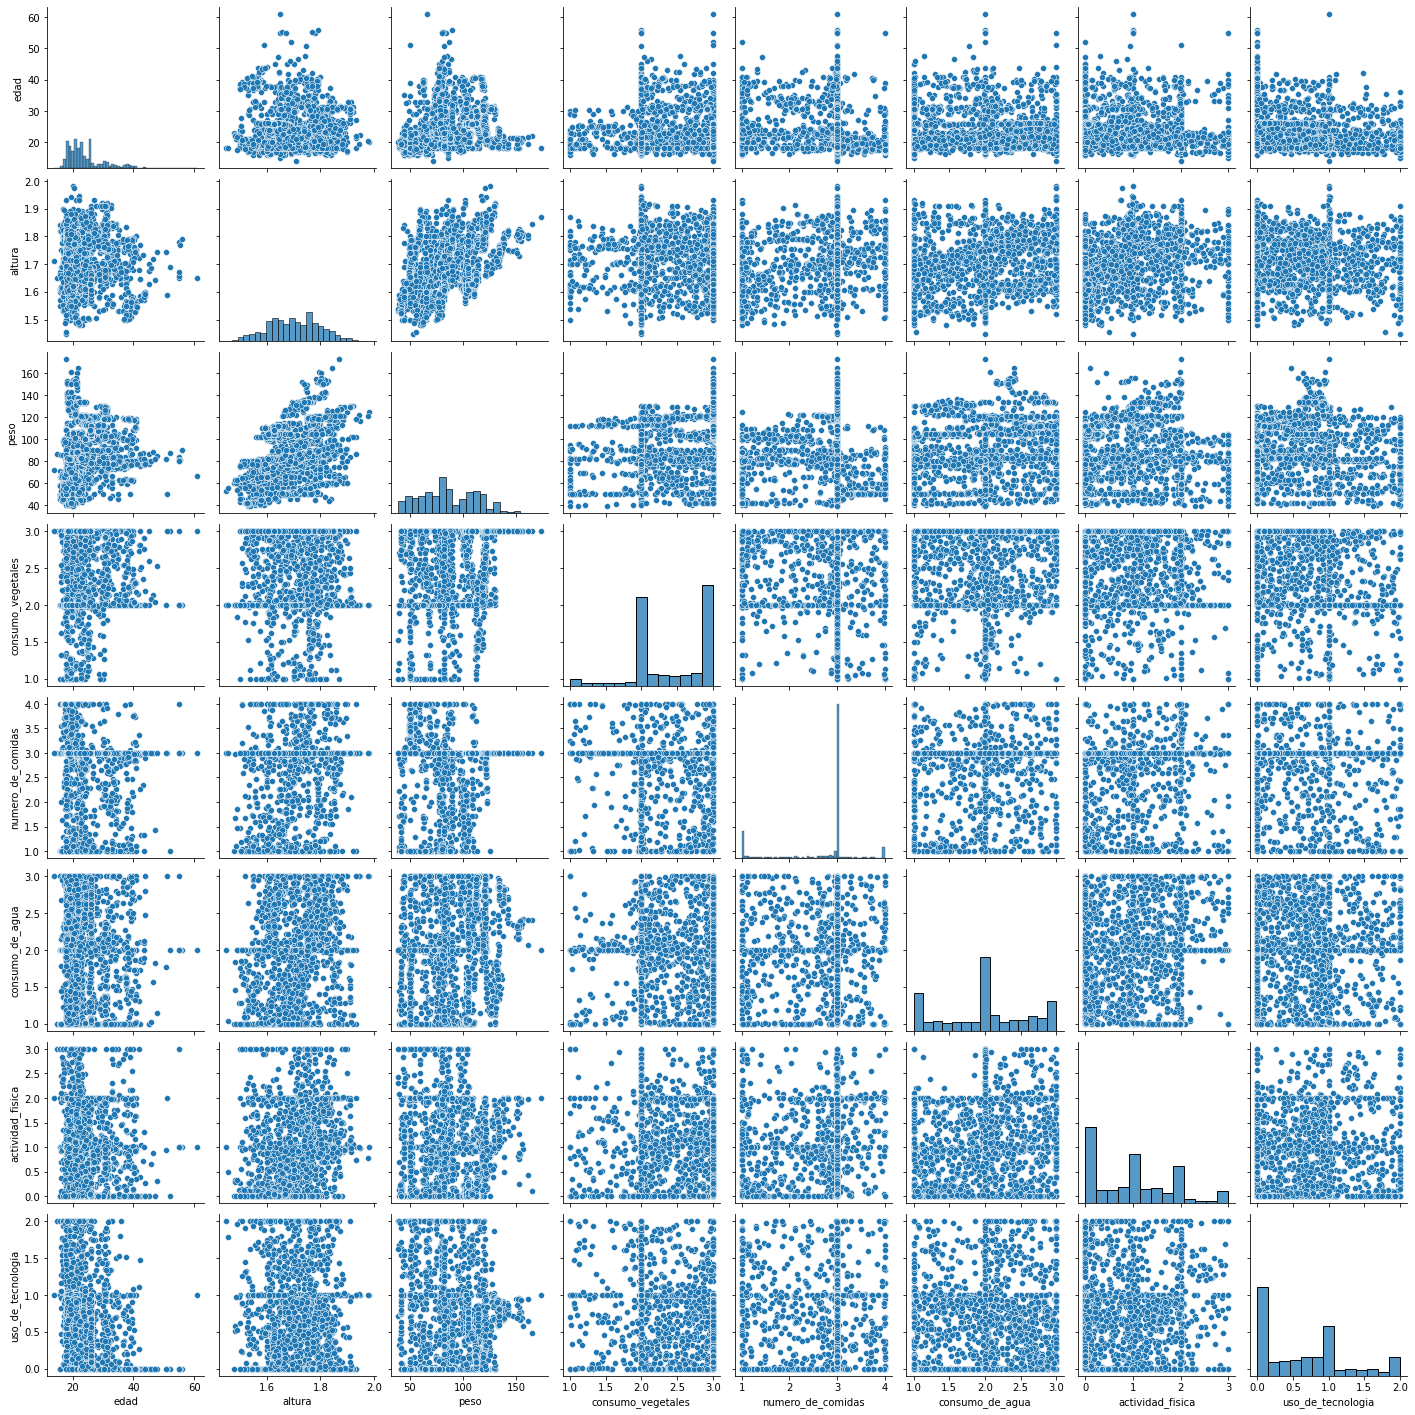

In [8]:
sns.pairplot(data, aspect=1)

# Preproceessing FT ing

In [9]:
# ## para bike
# data0 = data.copy()
# data0 = data0.drop(['dteday','casual','registered','cnt'],axis=1)
# print(data0.shape)
# data0.head()

In [10]:
## para obesity
data0 = data.copy()
data0 = data0.drop(['clasificacion'],axis=1)   # drop target
cols = ['historia_fam','consumo_alto_calorias','fuma','monitoreo_calorias']
data0[cols] = data0[cols].replace({'yes':1, 'no':0})
data0['sexo'] = data0['sexo'].replace({'Female':1, 'Male':0})
data0 = pd.get_dummies(data0, drop_first=True, prefix_sep='__')
print(data0.shape)
data0.head()

(2111, 23)


,sexo,edad,altura,peso,historia_fam,consumo_alto_calorias,consumo_vegetales,numero_de_comidas,fuma,consumo_de_agua,...,alimentos_entre_comidas__Frequently,alimentos_entre_comidas__Sometimes,alimentos_entre_comidas__no,consumo_alcohol__Frequently,consumo_alcohol__Sometimes,consumo_alcohol__no,medio_de_transporte__Bike,medio_de_transporte__Motorbike,medio_de_transporte__Public_Transportation,medio_de_transporte__Walking
0,1,21.00,1.62,64.00,1,0,2.00,3.00,0,2.00,...,0,1,0,0,0,1,0,0,1,0
1,1,21.00,1.52,56.00,1,0,3.00,3.00,1,3.00,...,0,1,0,0,1,0,0,0,1,0
2,0,23.00,1.80,77.00,1,0,2.00,3.00,0,2.00,...,0,1,0,1,0,0,0,0,1,0
3,0,27.00,1.80,87.00,0,0,3.00,3.00,0,2.00,...,0,1,0,1,0,0,0,0,0,1
4,0,22.00,1.78,89.80,0,0,2.00,1.00,0,2.00,...,0,1,0,0,1,0,0,0,1,0


In [11]:
data0.describe().T

,count,mean,std,min,25%,50%,75%,max
sexo,"2,111.00",0.49,0.50,0.00,0.00,0.00,1.00,1.00
edad,"2,111.00",24.31,6.35,14.00,19.95,22.78,26.00,61.00
altura,"2,111.00",1.70,0.09,1.45,1.63,1.70,1.77,1.98
peso,"2,111.00",86.59,26.19,39.00,65.47,83.00,107.43,173.00
historia_fam,"2,111.00",0.82,0.39,0.00,1.00,1.00,1.00,1.00
consumo_alto_calorias,"2,111.00",0.88,0.32,0.00,1.00,1.00,1.00,1.00
consumo_vegetales,"2,111.00",2.42,0.53,1.00,2.00,2.39,3.00,3.00
numero_de_comidas,"2,111.00",2.69,0.78,1.00,2.66,3.00,3.00,4.00
fuma,"2,111.00",0.02,0.14,0.00,0.00,0.00,0.00,1.00
consumo_de_agua,"2,111.00",2.01,0.61,1.00,1.58,2.00,2.48,3.00


## Normalizar los datos

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
data1 = MinMaxScaler().fit_transform(data0)
data1 = pd.DataFrame(data1, columns=data0.columns, index=data0.index)
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
sexo,"2,111.00",0.49,0.50,0.00,0.00,0.00,1.00,1.00
edad,"2,111.00",0.22,0.14,0.00,0.13,0.19,0.26,1.00
altura,"2,111.00",0.47,0.18,0.00,0.34,0.47,0.60,1.00
peso,"2,111.00",0.36,0.20,0.00,0.20,0.33,0.51,1.00
historia_fam,"2,111.00",0.82,0.39,0.00,1.00,1.00,1.00,1.00
consumo_alto_calorias,"2,111.00",0.88,0.32,0.00,1.00,1.00,1.00,1.00
consumo_vegetales,"2,111.00",0.71,0.27,0.00,0.50,0.69,1.00,1.00
numero_de_comidas,"2,111.00",0.56,0.26,0.00,0.55,0.67,0.67,1.00
fuma,"2,111.00",0.02,0.14,0.00,0.00,0.00,0.00,1.00
consumo_de_agua,"2,111.00",0.50,0.31,0.00,0.29,0.50,0.74,1.00


# PCA

In [14]:
from sklearn.decomposition import PCA

In [15]:
print("Numero de variables del dataset=", len(data1.columns))

Numero de variables del dataset= 23


In [16]:
pca_out = PCA(n_components=5).fit(data1)

print(f"# de componentes = {len(pca_out.explained_variance_ratio_)}, explica el = {round(sum(pca_out.explained_variance_ratio_)*100,2)}%")
pca_out.explained_variance_ratio_

# de componentes = 5, explica el = 65.55%


array([0.21861535, 0.16223259, 0.11849582, 0.09408111, 0.06207812])

In [17]:
pca_out = PCA(n_components=10).fit(data1)

print(f"# de componentes = {len(pca_out.explained_variance_ratio_)}, explica el = {round(sum(pca_out.explained_variance_ratio_)*100,2)}%")
pca_out.explained_variance_ratio_

# de componentes = 10, explica el = 86.55%


array([0.21861535, 0.16223259, 0.11849582, 0.09408111, 0.06207814,
       0.05504139, 0.04676591, 0.04139724, 0.03738926, 0.02942558])

## Importancia

In [18]:
def get_matriz_imp(pca_out,data):
    # component loadings or weights (correlation coefficient between original variables and the component) 
    # component loadings represents the elements of the eigenvector
    # the squared loadings within the PCs always sums to 1
    loadings = pca_out.components_
    num_pc = pca_out.n_features_
    pc_list = ["PC"+str(i).zfill(2) for i in list(range(1, num_pc+1))]
    df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
    df['variable'] = data.columns.values
    df = df.set_index('variable')

    plt.figure(figsize=(20,12))
    sns.heatmap(df, annot=True, cmap='bwr')
    plt.show()

    return df

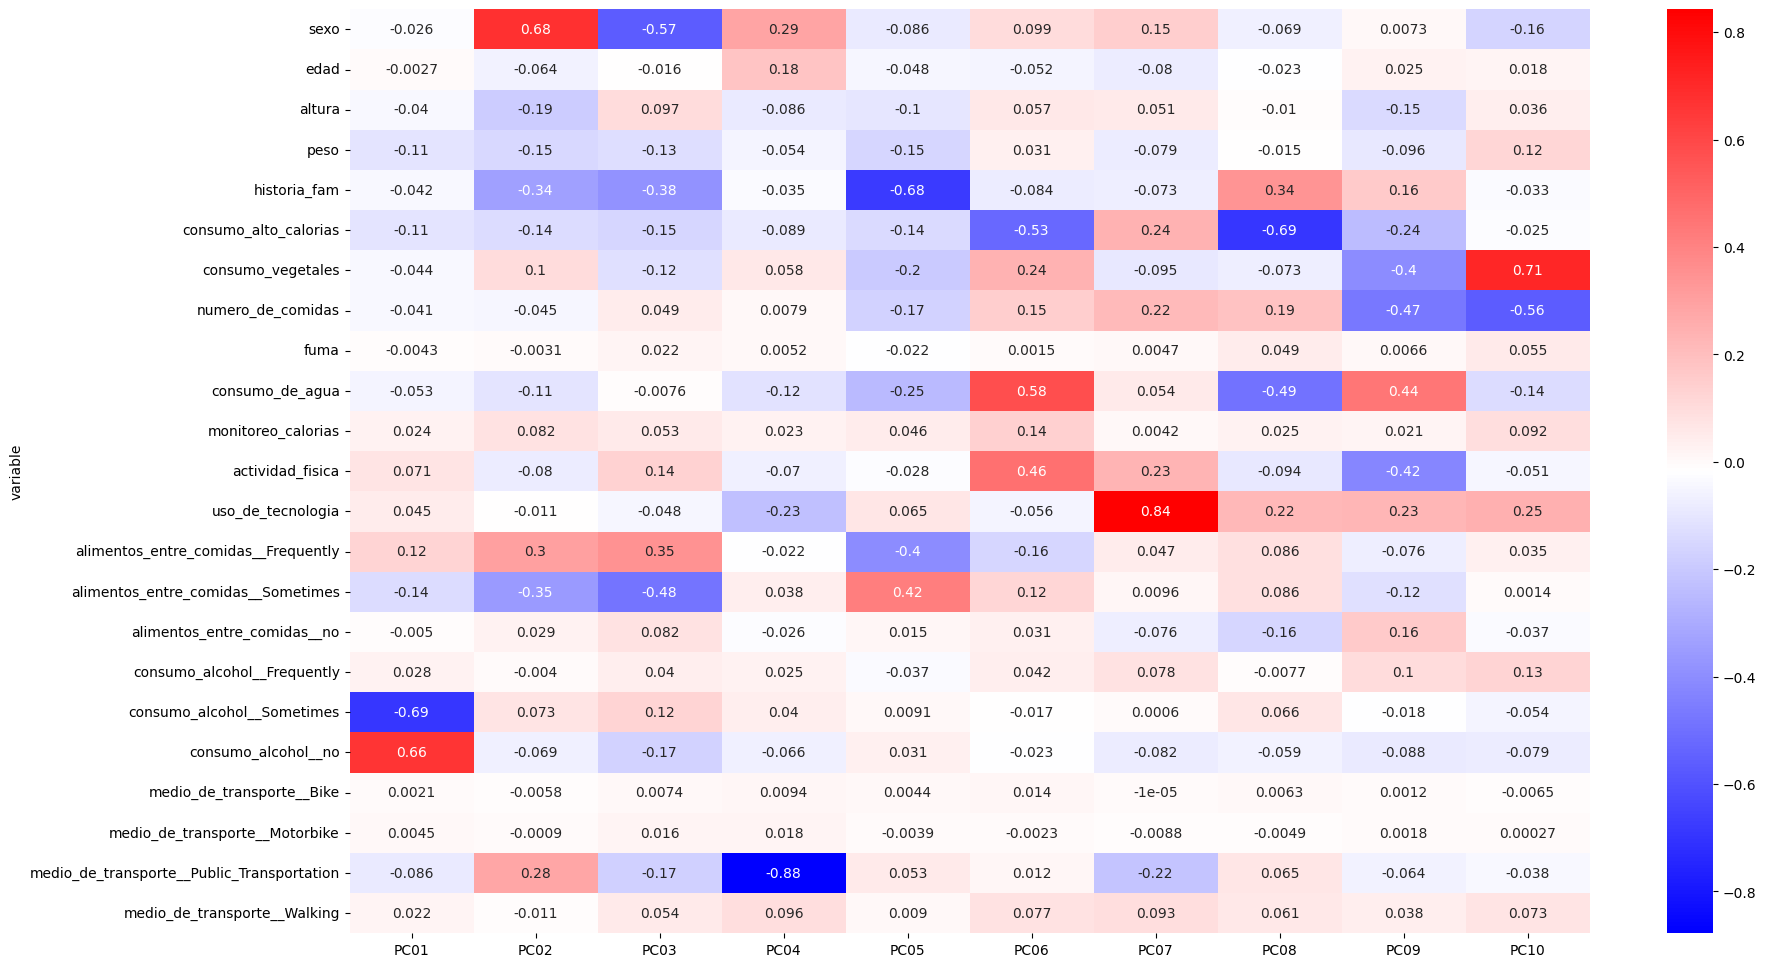

In [19]:
var_pc = get_matriz_imp(pca_out,data1)

In [20]:
def list_var_for_PC(var_pc, ui:float=0.25):
    # ui --> umbral de importancia
    for x in var_pc:
        va = list(var_pc[abs(var_pc[x])>=ui][x].index)
        va = [str(v) for v in sorted(va)]
        print(f"{x}:\tnumber of vars={len(va)}, vars={','.join(va)}")
    return
list_var_for_PC(var_pc)

PC01:	number of vars=2, vars=consumo_alcohol__Sometimes,consumo_alcohol__no
PC02:	number of vars=5, vars=alimentos_entre_comidas__Frequently,alimentos_entre_comidas__Sometimes,historia_fam,medio_de_transporte__Public_Transportation,sexo
PC03:	number of vars=4, vars=alimentos_entre_comidas__Frequently,alimentos_entre_comidas__Sometimes,historia_fam,sexo
PC04:	number of vars=2, vars=medio_de_transporte__Public_Transportation,sexo
PC05:	number of vars=3, vars=alimentos_entre_comidas__Frequently,alimentos_entre_comidas__Sometimes,historia_fam
PC06:	number of vars=3, vars=actividad_fisica,consumo_alto_calorias,consumo_de_agua
PC07:	number of vars=1, vars=uso_de_tecnologia
PC08:	number of vars=3, vars=consumo_alto_calorias,consumo_de_agua,historia_fam
PC09:	number of vars=4, vars=actividad_fisica,consumo_de_agua,consumo_vegetales,numero_de_comidas
PC10:	number of vars=2, vars=consumo_vegetales,numero_de_comidas


# PCA de data

In [21]:
pca_scores = PCA(n_components=10).fit_transform(data1)
pca = pd.DataFrame(pca_scores, columns=[f"PC{str(i+1).zfill(2)}" for i in range(len(pca_scores[0]))], index=data1.index)
pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC01    2111 non-null   float64
 1   PC02    2111 non-null   float64
 2   PC03    2111 non-null   float64
 3   PC04    2111 non-null   float64
 4   PC05    2111 non-null   float64
 5   PC06    2111 non-null   float64
 6   PC07    2111 non-null   float64
 7   PC08    2111 non-null   float64
 8   PC09    2111 non-null   float64
 9   PC10    2111 non-null   float64
dtypes: float64(10)
memory usage: 165.0 KB


In [22]:
pca.head()

,PC01,PC02,PC03,PC04,PC05,PC06,PC07,PC08,PC09,PC10
0,0.95,0.34,-0.61,-0.09,0.19,0.31,-0.15,0.69,0.41,-0.28
1,-0.37,0.53,-0.16,0.08,-0.06,1.35,-0.27,0.40,0.03,-0.01
2,0.36,-0.41,0.28,-0.36,0.14,0.61,0.02,0.74,0.26,0.08
3,0.46,-0.32,0.84,0.80,0.62,0.90,-0.08,0.24,-0.12,0.46
4,-0.37,0.09,0.63,-0.16,0.95,0.26,-0.71,0.30,0.45,0.22


In [23]:
from bioinfokit.visuz import cluster

In [24]:
data['clasificacion'].value_counts()
data['clasificacion'].str.split('_').str[0].value_counts()

Obesity         972
Overweight      580
Normal          287
Insufficient    272
Name: clasificacion, dtype: int64

<AxesSubplot:xlabel='PC01', ylabel='PC02'>

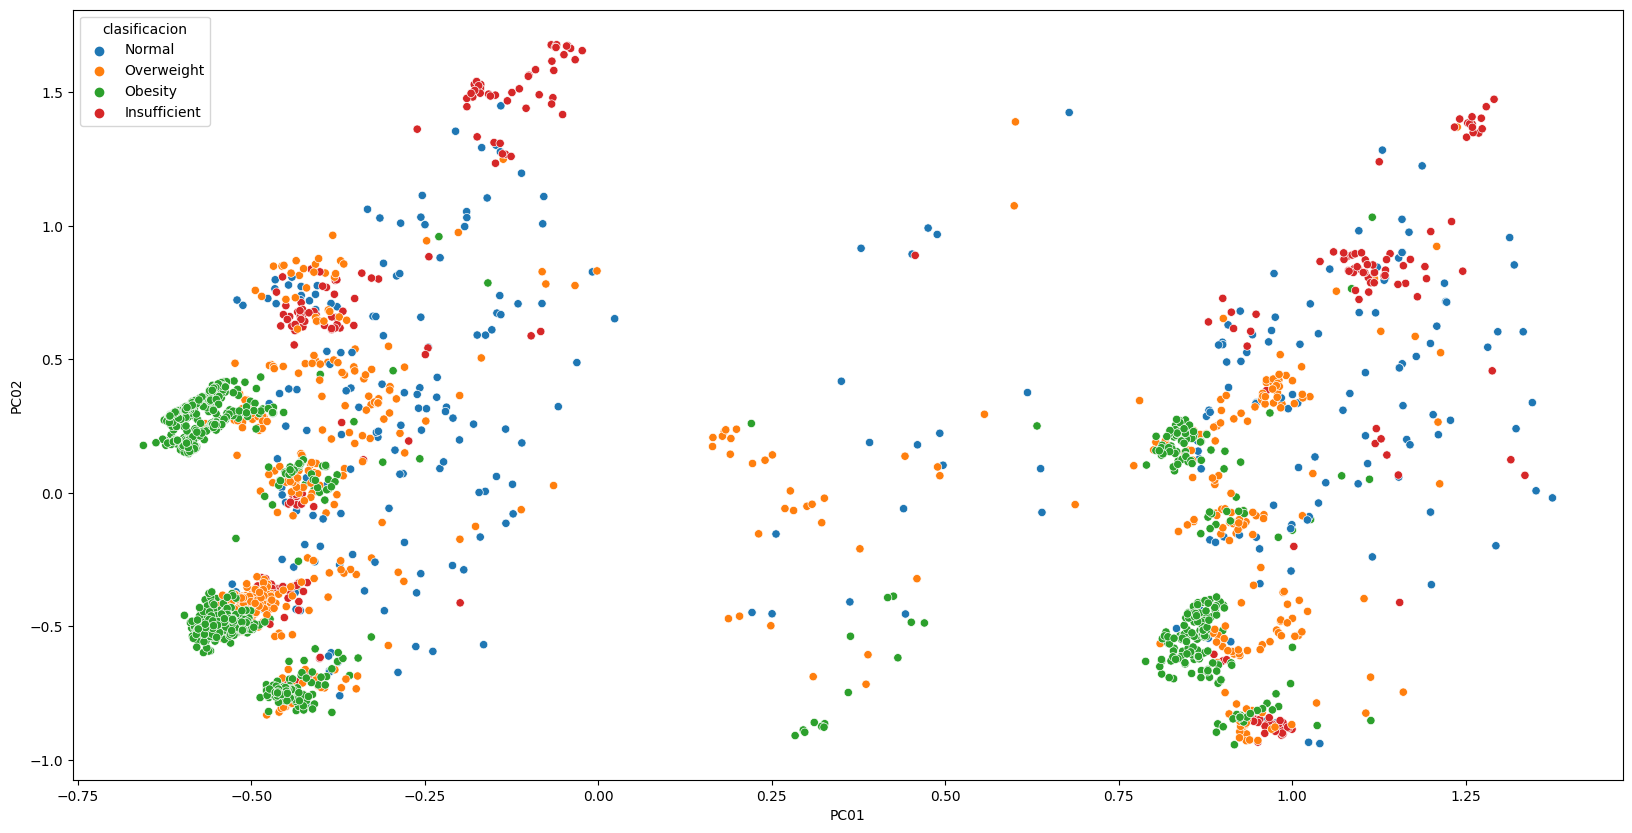

In [25]:
plt.figure(figsize=(20,10))
# sns.scatterplot(data=pca, x="PC01", y="PC02", hue=data['clasificacion'])
sns.scatterplot(data=pca, x="PC01", y="PC02", hue=data['clasificacion'].str.split('_').str[0])

In [26]:
map_colors = dict(zip(sorted(set(data['clasificacion'].str.split('_').str[0])), ["red","blue","green","orange"]))

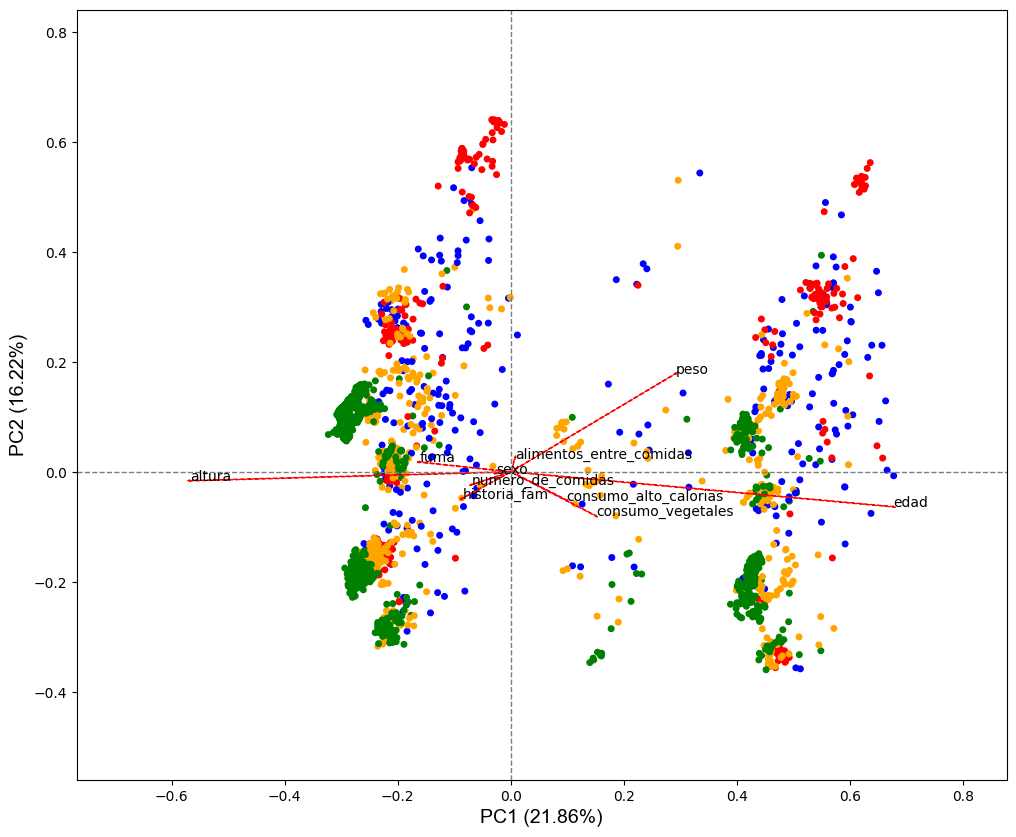

In [27]:
cluster.biplot(
            cscore=pca.values
            , loadings=var_pc.values
            , labels=list(data.columns)
            , colordot=data['clasificacion'].str.split('_').str[0].replace(map_colors)
            , dotsize=16
            , arrowcolor='r'
            , arrowlinewidth=0.9
            , arrowlinestyle='--'
            , show=True
            , dim=(12,10)
            , axlabelfontsize=14
            , var1=round(pca_out.explained_variance_ratio_[0]*100, 2)
            , var2=round(pca_out.explained_variance_ratio_[1]*100, 2)
        )

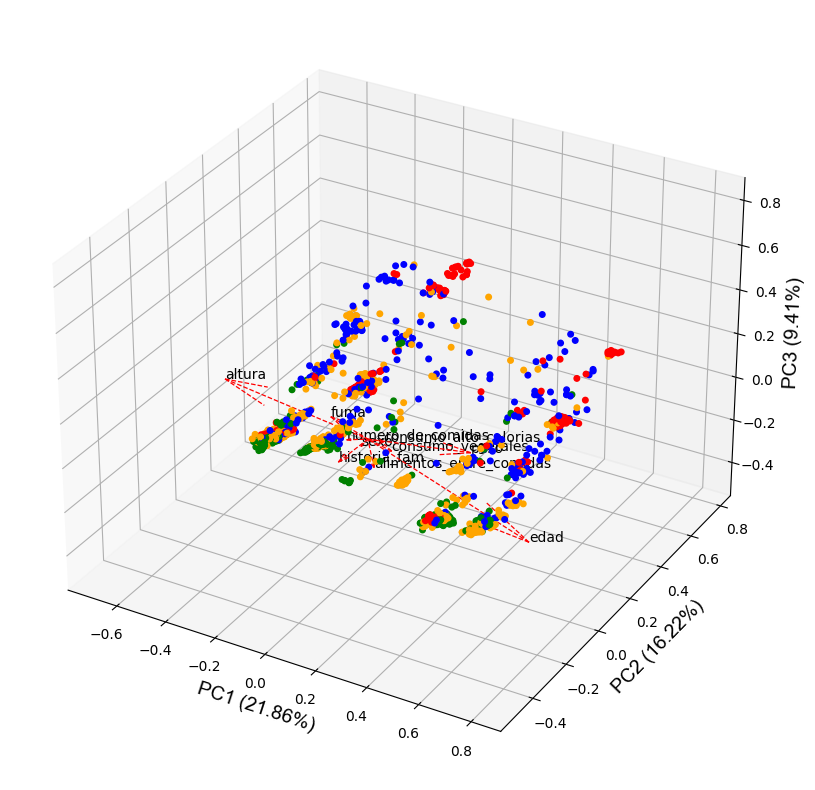

In [28]:
cluster.biplot(
            cscore=pca.values
            , loadings=var_pc.values
            , labels=list(data.columns)
            , colordot=data['clasificacion'].str.split('_').str[0].replace(map_colors)
            , dotsize=16
            , arrowcolor='r'
            , arrowlinewidth=0.9
            , arrowlinestyle='--'
            , show=True
            , dim=(12,10)
            , axlabelfontsize=14
            , var1=round(pca_out.explained_variance_ratio_[0]*100, 2)
            , var2=round(pca_out.explained_variance_ratio_[1]*100, 2)
            , var3=round(pca_out.explained_variance_ratio_[3]*100, 2)
        )